In [1]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
from graph_matching_tools.io.graph_dataset import GraphDataset
from graph_matching_tools.metrics import matching
import matplotlib.pyplot as plt
from graph_matching_tools.algorithms.multiway.hippi import hippi_multiway_matching
from graph_matching_tools.algorithms.kernels.gaussian import create_gaussian_node_kernel
from graph_matching_tools.algorithms.kernels.utils import create_full_node_affinity_matrix
from graph_matching_tools.algorithms.multiway.stiefel import sparse_stiefel_manifold_sync
from graph_matching_tools.algorithms.multiway import quickmatch
from graph_matching_tools.algorithms.multiway import matcheig
import scipy.io as sio

In [2]:
def get_permutation_matrix_from_dictionary(matching, g_sizes):
    """
    Create the full permutation matrix from the matching result
    :param matching: the matching result for each graph (nodes number, assignment)
    :param g_sizes: the list of the size of the different graph
    :return: the full permutation matrix
    """
    f_size = int(np.sum(g_sizes))
    res = np.zeros((f_size, f_size))

    idx1 = 0
    for i_g1 in range(len(g_sizes)):
        idx2 = 0
        for i_g2 in range(len(g_sizes)):
            match = matching["{},{}".format(i_g1, i_g2)]
            for k in match:
                res[idx1 + int(k), idx2 + match[k]] = 1
            idx2 += g_sizes[i_g2]
        idx1 += g_sizes[i_g1]
        
    np.fill_diagonal(res,1)
    return res

In [3]:
path_to_graph_folder = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/test_no_trial_folder/'
#path_to_dummy_graphs_folder = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/test_with_dummy/'

In [4]:
trials = np.sort(os.listdir(path_to_graph_folder))

sigma = 200

udim = 40

scores = {100:[],400:[],700:[],1000:[],1300:[]}

for trial in trials:
    
    if float(trial) >= 0.0:
        
        print('trial: ', trial)

        all_files = os.listdir(path_to_graph_folder+trial)

        for folder in all_files:

            if os.path.isdir(path_to_graph_folder+trial+'/'+ folder):

                print('Noise folder: ',folder)
                
#                 path_to_dummy_graphs = path_to_dummy_graphs_folder + '/' + trial + '/' + folder+'/0/graphs/'
                path_to_graphs = path_to_graph_folder + '/' + trial + '/' + folder+'/0/graphs/'
                path_to_groundtruth_ref = path_to_graph_folder + '/' + trial +'/' + folder + '/0/permutation_to_ref_graph.gpickle'
                path_to_groundtruth  = path_to_graph_folder + '/' + trial + '/' + folder + '/0/ground_truth.gpickle'

                noise = folder.split(',')[0].split('_')[1]
                graph_meta = GraphDataset(path_to_graphs, path_to_groundtruth_ref)
                ground_truth =  nx.read_gpickle(path_to_groundtruth)
          
                res = get_permutation_matrix_from_dictionary(ground_truth, graph_meta.sizes)
                
                node_kernel = create_gaussian_node_kernel(sigma,'coord')
                knode = create_full_node_affinity_matrix(graph_meta.list_graphs, node_kernel)
                
                P = matcheig.matcheig(knode, udim, graph_meta.sizes)
#                 P = U @ U.T

#                 U = quickmatch.quickmatch(graph_meta.list_graphs, 'coord', 0.26, 0.63)
    
#                 P = U @ U.T

                Quick_X = {}
                Quick_X['full_assignment_mat'] = P
                
                print('P shape', P.shape)

                sio.savemat(path_to_graph_folder + '/' + trial + '/' + folder + '/X_quickmatch.mat',Quick_X)

                f1, prec, rec = matching.compute_f1score(P,res)

                scores[int(noise)].append(f1)

trial:  0
Noise folder:  noise_100,outliers_varied
P shape (371, 371)
Noise folder:  noise_400,outliers_varied
P shape (386, 386)
Noise folder:  noise_700,outliers_varied
P shape (331, 331)
Noise folder:  noise_1300,outliers_varied
P shape (371, 371)
Noise folder:  noise_1000,outliers_varied
P shape (391, 391)
trial:  1
Noise folder:  noise_100,outliers_varied
P shape (399, 399)
Noise folder:  noise_400,outliers_varied
P shape (376, 376)
Noise folder:  noise_700,outliers_varied
P shape (373, 373)
Noise folder:  noise_1300,outliers_varied
P shape (346, 346)
Noise folder:  noise_1000,outliers_varied
P shape (356, 356)
trial:  2
Noise folder:  noise_100,outliers_varied
P shape (374, 374)
Noise folder:  noise_400,outliers_varied
P shape (406, 406)
Noise folder:  noise_700,outliers_varied
P shape (401, 401)
Noise folder:  noise_1300,outliers_varied
P shape (378, 378)
Noise folder:  noise_1000,outliers_varied
P shape (379, 379)
trial:  3
Noise folder:  noise_100,outliers_varied
P shape (363,

In [8]:
scores
match_eig = scores

In [10]:
kmeans = {100: [0.633630289532294,
  0.5964303420922161,
  0.6086483546369322,
  0.60486674391657],
 400: [0.7458039406470445,
  0.760277365032194,
  0.6800560485754321,
  0.6219205630970336],
 700: [0.7498272287491362,
  0.7080394922425952,
  0.61010101010101,
  0.6971312515866971],
 1000: [0.7381974248927039,
  0.681999386691199,
  0.6434782608695652,
  0.6336032388663968],
 1300: [0.7844391153743672,
  0.7408305547135495,
  0.6871002132196162,
  0.7225617208506478]}

In [7]:
quick_match = {100: [0.14484272128749087,
  0.12236842105263158,
  0.1318051575931232,
  0.1385714285714286],
 400: [0.13870776526378187,
  0.13641755634638197,
  0.13211009174311927,
  0.15546218487394958],
 700: [0.16313213703099513,
  0.15613910574875797,
  0.15036496350364964,
  0.14882506527415146],
 1000: [0.14947498455836938,
  0.15445859872611464,
  0.1475529583637692,
  0.15547703180212016],
 1300: [0.1452513966480447,
  0.15882352941176472,
  0.14603616133518776,
  0.13750767341927564]}

In [9]:
def score_mean_std(scores):
    
    avg_scores = []
    std_scores = []

    for keys,values in scores.items():
        avg_scores.append(np.mean(values))
        std_scores.append(np.std(values))
        
    return np.array(avg_scores), np.array(std_scores)

In [11]:
kmeans_mean, kmeans_std  = score_mean_std(kmeans)
quick_means, quick_std  = score_mean_std(quick_match)
match_mean, match_std = score_mean_std(match_eig)

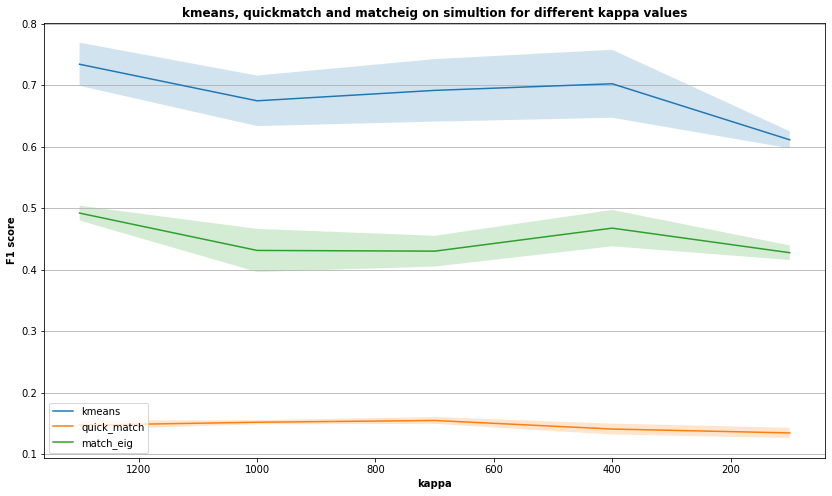

In [14]:
plt.figure(figsize=(14, 8))

plt.plot(list(scores.keys()), kmeans_mean ,label = 'kmeans')
plt.fill_between(list(scores.keys()), kmeans_mean - kmeans_std, kmeans_mean + kmeans_std, alpha=0.2)


plt.plot(list(scores.keys()), quick_means ,label = 'quick_match')
plt.fill_between(list(scores.keys()), quick_means - quick_std, quick_means + quick_std, alpha=0.2)



plt.plot(list(scores.keys()), match_mean ,label = 'match_eig')
plt.fill_between(list(scores.keys()), match_mean - match_std, match_mean + match_std, alpha=0.2)



plt.xlabel('kappa',fontweight="bold")
plt.ylabel('F1 score',fontweight="bold")
plt.legend(loc = 'lower left')
plt.title('kmeans, quickmatch and matcheig on simultion for different kappa values',fontweight="bold")
plt.gca().yaxis.grid(True)
plt.gca().invert_xaxis()
plt.show()

In [70]:
gt_path = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/simu_test_single_noise/0.0/noise_1000,outliers_varied/ground_truth.gpickle'
dummy_path = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/simu_with_dummy/0.0/noise_1000,outliers_varied/0/graphs/'
non_dummy_path = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/simu_test_single_noise/0.0/noise_1000,outliers_varied/'

In [71]:
cao_kappa_1000 = sio.loadmat('X_cao_cst_o.mat')['X']
mals_kappa_1000 = sio.loadmat('X_mALS.mat')['X']
all_dummy_graphs = [nx.read_gpickle(dummy_path+'/'+g) for g in np.sort(os.listdir(dummy_path))]

In [72]:
graph_m = GraphDataset(non_dummy_path + '/graphs', non_dummy_path + '/permutation_to_ref_graph.gpickle')
gt = nx.read_gpickle(gt_path)
res = get_permutation_matrix_from_dictionary(gt, graph_m.sizes)

In [73]:
dummy_mask = [list(nx.get_node_attributes(graph,'is_dummy').values()) for graph in all_dummy_graphs]
dummy_mask = sum(dummy_mask,[])
dummy_indexes = [i for i in range(len(dummy_mask)) if dummy_mask[i]==True]   

In [74]:
cao = np.delete(cao_kappa_1000,dummy_indexes,0) # delete the dummy rows
cao = np.delete(cao,dummy_indexes,1) # delete the dummy columns

In [75]:
mAls = np.delete(mals_kappa_1000,dummy_indexes,0) # delete the dummy rows
mAls = np.delete(mAls,dummy_indexes,1) # delete the dummy columns

In [76]:
matching.compute_f1score(cao,res)

(0.6272369172851308, 0.5803358931064015, 0.6823852691026986)

In [77]:
matching.compute_f1score(mAls,res)

(0.9380620970030821, 0.8916261248732832, 0.9896005883722264)